# **Import Dataset**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve





df = pd.read_csv('Class-smell.csv')
print("Shape of original DataFrame: ", df.shape)
df



Shape of original DataFrame:  (91790, 49)


,Unnamed: 0,Address,Brain Class,Data Class,Futile Abstract Pipeline,Futile Hierarchy,God Class,Schizofrenic Class,ABUSEINH,AMW,...,NrBM,NrEC,NrFE,NrIC,NrSS,PNAS,SCHIZO,TCC,WMC,WOC
0,4,org.apache.ambari.log4j.hadoop.mapreduce.jobhi...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,0.00,2,0.00,3,1.0
1,46,org.apache.ambari.msi.StateProvider,0,0,0,0,0,1,0,0.0,...,0,0,0,0,0,-1.00,3,0.00,0,1.0
2,73,org.apache.ambari.server.controller.AbstractRo...,0,0,0,1,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,1.0
3,87,org.apache.ambari.server.controller.internal.A...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,4,0.14,9,1.0
4,89,org.apache.ambari.server.controller.internal.H...,0,0,0,0,0,1,0,1.0,...,0,0,0,0,0,-1.00,2,0.71,9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91785,303145,org.apache.bookkeeper.common.testing.annotatio...,0,0,0,0,0,0,0,0.0,...,0,0,0,0,0,-1.00,0,0.00,0,0.0
91786,302625,com.scurrilous.circe.params.SipHash24Parameters,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.67,0,0.00,5,1.0
91787,63756,org.springframework.security.oauth.provider.to...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,0.00,0,0.00,1,0.0
91788,25671,org.eclipse.mylyn.internal.github.ui.gist.Crea...,0,0,0,0,0,0,0,1.0,...,0,0,0,0,0,-1.00,0,1.00,2,0.0


# **Create new label 'IsCodeSmell'**

In [17]:
smell_columns = [
    'Brain Class', 'Data Class', 'Futile Abstract Pipeline', 'Futile Hierarchy',
    'God Class', 'Schizofrenic Class'
]

df['IsCodeSmell'] = df[smell_columns].max(axis=1)

df = df.drop(columns=['Unnamed: 0', 'Address'] + smell_columns)

print("Shape of the data frame: ",df.shape)
print("Total null values: ",df.isna().sum())
print("Duplicate values: ",df.duplicated().sum())
print("Shape of original DataFrame: ", df.shape)
df = df.drop_duplicates()
print("Duplicate values: ",df.duplicated().sum())
print("Shape of the data frame: ",df.shape)

Shape of the data frame:  (91790, 42)
Total null values:  ABUSEINH       0
AMW            0
ATFD           0
BOvM           0
BUR            0
CBO            0
CC             0
CM             0
CRIX           0
DAC            0
DIT            0
EDUPCLS        0
FANOUT         0
FDP            0
GREEDY         0
HDUPCLS        0
HIT            0
IDUPLINES      0
LOCC           0
NAS            0
NAbsM          0
NDU            0
NOA            0
NOAM           0
NOD            0
NODD           0
NOM            0
NOPA           0
NProtM         0
NSPECM         0
NTempF         0
NrBM           0
NrEC           0
NrFE           0
NrIC           0
NrSS           0
PNAS           0
SCHIZO         0
TCC            0
WMC            0
WOC            0
IsCodeSmell    0
dtype: int64
Duplicate values:  18087
Shape of original DataFrame:  (91790, 42)
Duplicate values:  0
Shape of the data frame:  (73703, 42)


# **Label Distribution**

C:\Users\PC\AppData\Local\Temp\ipykernel_10716\391680369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='IsCodeSmell', palette='Set2')


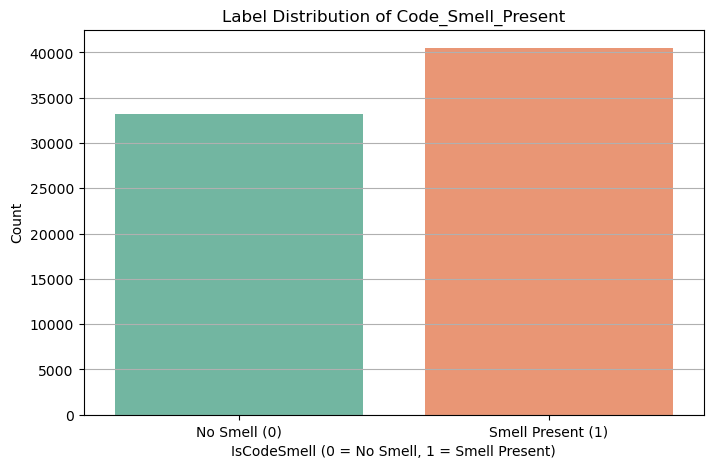

IsCodeSmell
1    40485
0    33218
Name: count, dtype: int64

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='IsCodeSmell', palette='Set2')
plt.title('Label Distribution of Code_Smell_Present')
plt.xlabel('IsCodeSmell (0 = No Smell, 1 = Smell Present)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Smell (0)', 'Smell Present (1)'])
plt.grid(axis='y')
plt.show()
df['IsCodeSmell'].value_counts()

# **Split features and target**

In [19]:
X = df.drop(columns=['IsCodeSmell'])
y = df['IsCodeSmell']

## **Split into Train and Test**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Evaluate Function**

In [21]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    """
    Trains and evaluates the given model, and displays performance metrics.
    """

   # Make predictions on training data
    y_train_pred = model.predict(X_train)

    # Make predictions on test data
    y_test_pred = model.predict(X_test)

    # Calculate and display metrics for training data
    print(f"--- Performance of {model_name} on Training Data ---")
    print("Training Accuracy Score:", accuracy_score(y_train, y_train_pred))
    print("Training Classification Report:\n", classification_report(y_train, y_train_pred))

    # Calculate and display metrics for test data
    print(f"\n--- Performance of {model_name} on Test Data ---")
    print("Testing Accuracy Score:", accuracy_score(y_test, y_test_pred))
    print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix for Training Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Confusion Matrix for Test Data
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Testing Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC Score for Test Data
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    roc_auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

# **Random Forest**

Feature Importances:
      Feature  Importance
37     SCHIZO    0.398959
8        CRIX    0.218520
23       NOAM    0.062665
18       LOCC    0.061260
40        WOC    0.058400
22        NOA    0.037937
27       NOPA    0.026909
39        WMC    0.024631
26        NOM    0.021260
1         AMW    0.008856
38        TCC    0.007956
12     FANOUT    0.007454
5         CBO    0.007021
20      NAbsM    0.004363
10        DIT    0.004353
9         DAC    0.004217
24        NOD    0.004121
7          CM    0.003752
2        ATFD    0.003580
6          CC    0.003453
25       NODD    0.003442
36       PNAS    0.003417
13        FDP    0.003400
14     GREEDY    0.002968
31       NrBM    0.002886
30     NTempF    0.002533
16        HIT    0.002516
28     NProtM    0.002439
19        NAS    0.001998
4         BUR    0.001487
33       NrFE    0.000747
29     NSPECM    0.000639
3        BOvM    0.000629
34       NrIC    0.000524
35       NrSS    0.000312
21        NDU    0.000190
0    ABUSEINH    

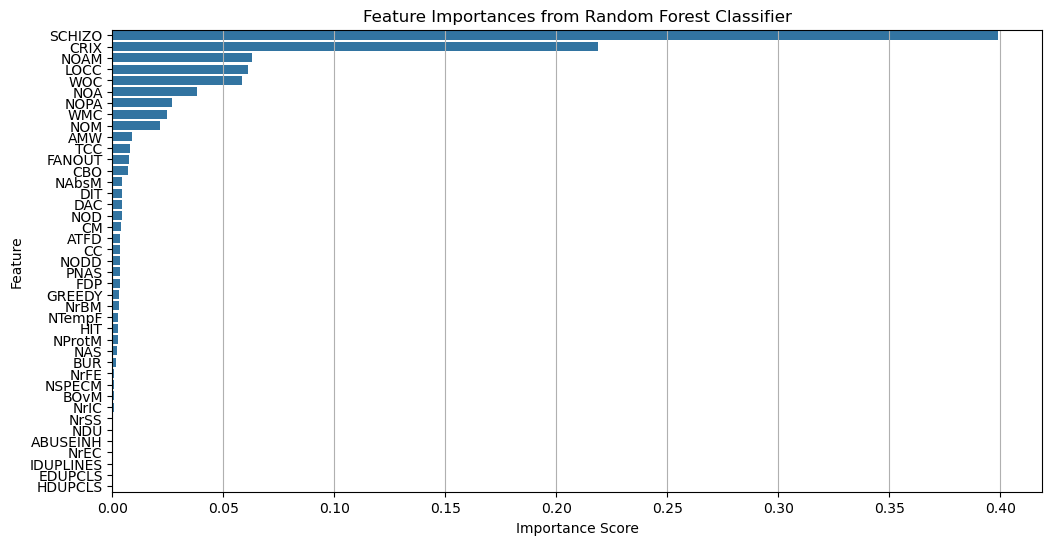

Cross-Validation Scores: [0.99423387 0.99397948 0.99372456 0.99508141 0.99457259]
Mean Cross-Validation Score: 0.994318381727495
--- Performance of Random Forest Classifier on Training Data ---
Training Accuracy Score: 0.9999321596960754
Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     26659
           1       1.00      1.00      1.00     32303

    accuracy                           1.00     58962
   macro avg       1.00      1.00      1.00     58962
weighted avg       1.00      1.00      1.00     58962


--- Performance of Random Forest Classifier on Test Data ---
Testing Accuracy Score: 0.9953870158062547
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6559
           1       1.00      0.99      1.00      8182

    accuracy                           1.00     14741
   macro avg       0.99      1.00      1.00    

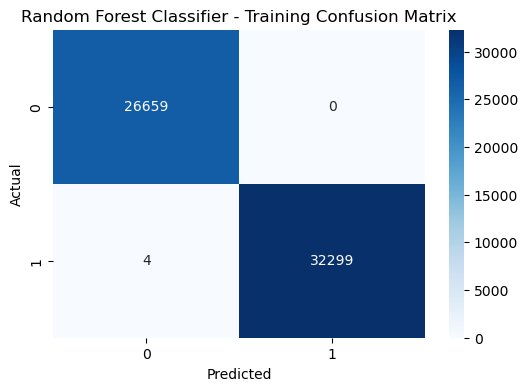

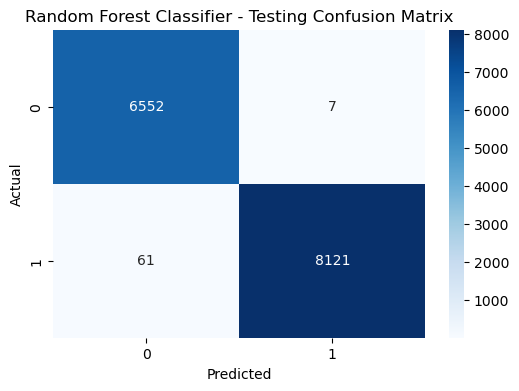

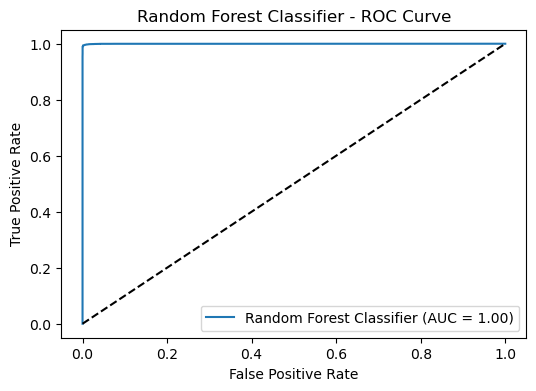

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("Feature Importances:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()




# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


evaluate_model(rf_model, X_test, y_test, model_name='Random Forest Classifier')

# **Gradient Boosting**


Feature Importances for Gradient Boosting Classifier:
      Feature  Importance
37     SCHIZO    0.611231
8        CRIX    0.375206
24        NOD    0.005210
16        HIT    0.002013
1         AMW    0.001634
25       NODD    0.001167
18       LOCC    0.000710
39        WMC    0.000670
10        DIT    0.000546
33       NrFE    0.000435
28     NProtM    0.000429
20      NAbsM    0.000184
4         BUR    0.000172
38        TCC    0.000089
36       PNAS    0.000068
34       NrIC    0.000049
3        BOvM    0.000045
23       NOAM    0.000043
40        WOC    0.000029
31       NrBM    0.000029
19        NAS    0.000018
22        NOA    0.000009
26        NOM    0.000007
9         DAC    0.000003
12     FANOUT    0.000003
0    ABUSEINH    0.000001
13        FDP    0.000000
27       NOPA    0.000000
14     GREEDY    0.000000
29     NSPECM    0.000000
17  IDUPLINES    0.000000
15    HDUPCLS    0.000000
32       NrEC    0.000000
11    EDUPCLS    0.000000
21        NDU    0.000000
35       

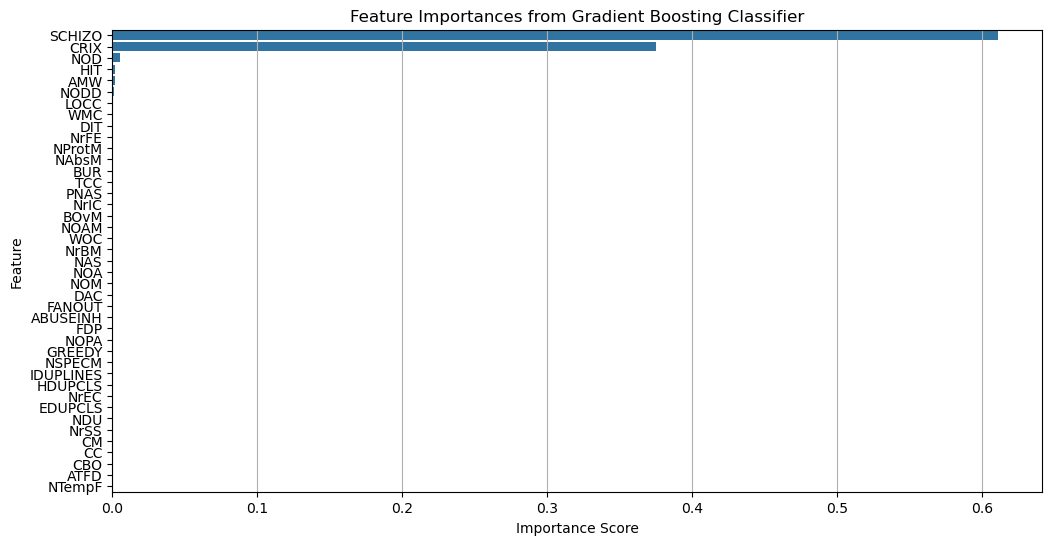

Cross-Validation Scores (Gradient Boosting): [0.99448826 0.99465785 0.99465739 0.99448779 0.99567503]
Mean Cross-Validation Score (Gradient Boosting): 0.9947932641434256
--- Performance of Gradient Boosting Classifier on Training Data ---
Training Accuracy Score: 0.9954716597130355
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     26659
           1       1.00      0.99      1.00     32303

    accuracy                           1.00     58962
   macro avg       1.00      1.00      1.00     58962
weighted avg       1.00      1.00      1.00     58962


--- Performance of Gradient Boosting Classifier on Test Data ---
Testing Accuracy Score: 0.9946407977749135
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6559
           1       1.00      0.99      1.00      8182

    accuracy                           0.99     1474

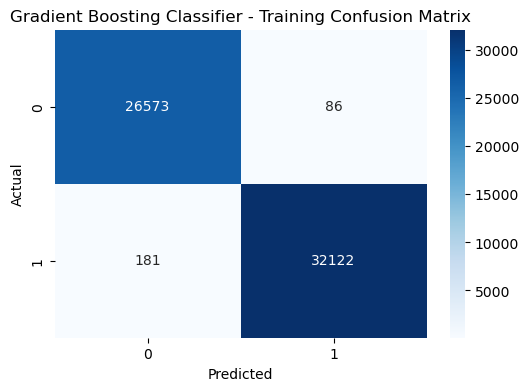

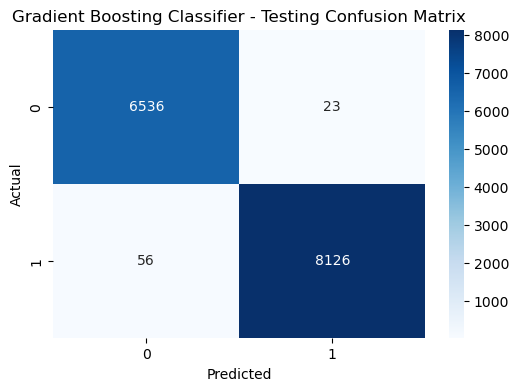

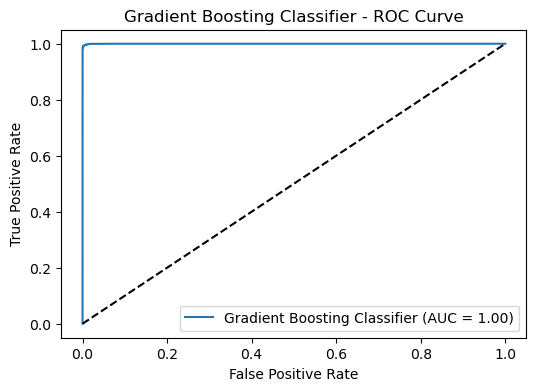

In [23]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
importances = gb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for Gradient Boosting Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Gradient Boosting Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Gradient Boosting):", cv_scores_gb)
print("Mean Cross-Validation Score (Gradient Boosting):", np.mean(cv_scores_gb))


evaluate_model(gb_model, X_test, y_test, model_name='Gradient Boosting Classifier')


# **Logistic Regression**

d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Apps\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

Cross-Validation Scores (Logistic Regression): [0.9482744  0.94971593 0.95149254 0.9504749  0.95157734]
Mean Cross-Validation Score (Logistic Regression): 0.9503070218735881
--- Performance of Logistic Regression on Training Data ---
Training Accuracy Score: 0.960499983039924
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     26659
           1       0.96      0.97      0.96     32303

    accuracy                           0.96     58962
   macro avg       0.96      0.96      0.96     58962
weighted avg       0.96      0.96      0.96     58962


--- Performance of Logistic Regression on Test Data ---
Testing Accuracy Score: 0.9569228681907604
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      6559
           1       0.95      0.97      0.96      8182

    accuracy                           0.96     14741
   macro avg 

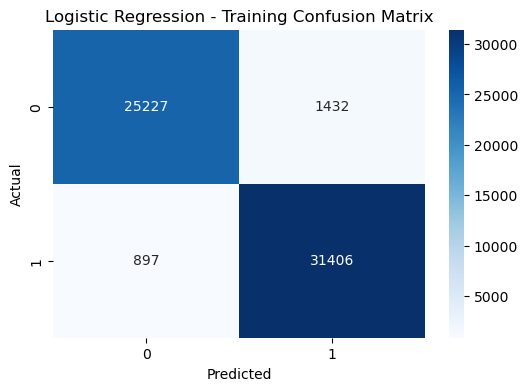

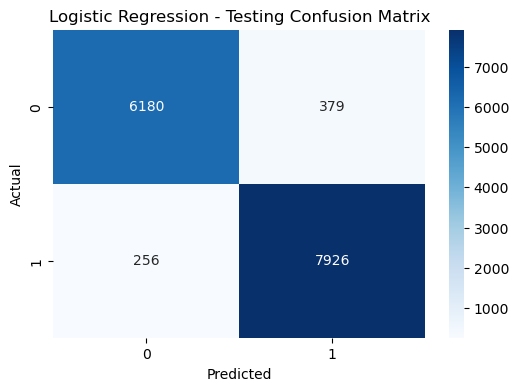

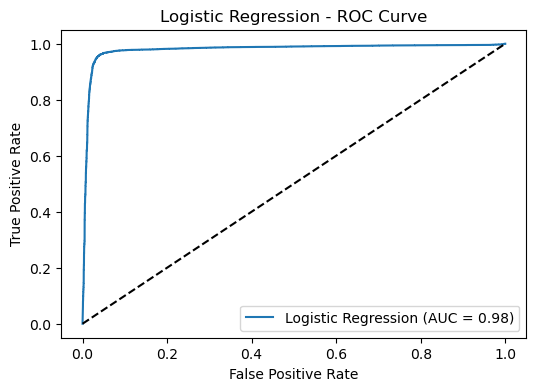

In [24]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (Logistic Regression):", cv_scores_lr)
print("Mean Cross-Validation Score (Logistic Regression):", np.mean(cv_scores_lr))

evaluate_model(lr_model, X_test, y_test, model_name='Logistic Regression')

# **Multi-Layer Perceptron (MLP)**

Cross-Validation Scores (MLP): [0.99185958 0.99185958 0.99024763 0.99321574 0.98626187]
Mean Cross-Validation Score (MLP): 0.9906888785760612
--- Performance of Multi-Layer Perceptron (MLP) Classifier on Training Data ---
Training Accuracy Score: 0.9954377395610733
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     26659
           1       1.00      0.99      1.00     32303

    accuracy                           1.00     58962
   macro avg       1.00      1.00      1.00     58962
weighted avg       1.00      1.00      1.00     58962


--- Performance of Multi-Layer Perceptron (MLP) Classifier on Test Data ---
Testing Accuracy Score: 0.9928770097008344
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6559
           1       1.00      0.99      0.99      8182

    accuracy                           0.99     14741
   m

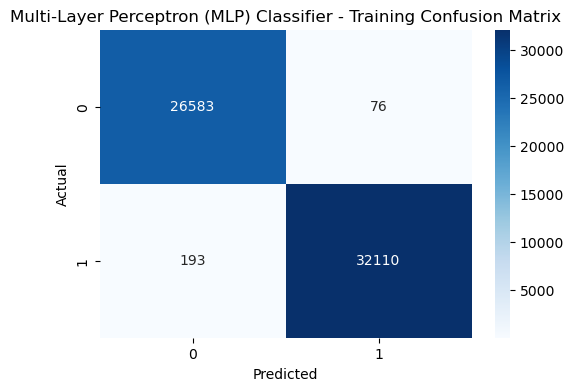

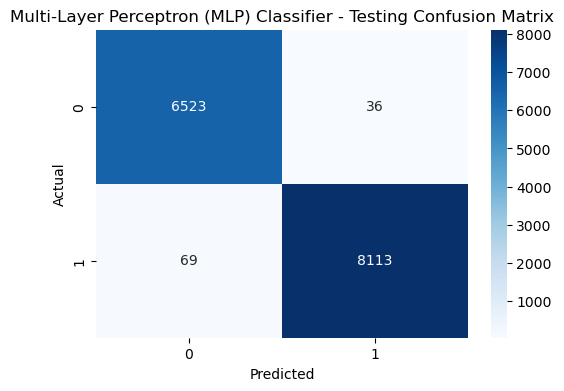

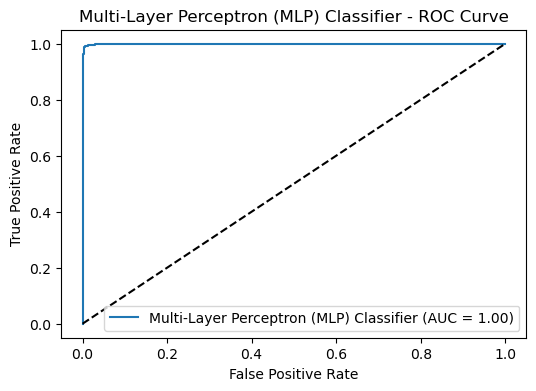

In [25]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (MLP):", cv_scores_mlp)
print("Mean Cross-Validation Score (MLP):", np.mean(cv_scores_mlp))

evaluate_model(mlp_model, X_test, y_test, model_name='Multi-Layer Perceptron (MLP) Classifier')


# **AdaBoost Classifier**

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Feature Importances for AdaBoost Classifier:
      Feature  Importance
8        CRIX        0.22
1         AMW        0.08
24        NOD        0.08
16        HIT        0.06
10        DIT        0.06
18       LOCC        0.06
33       NrFE        0.06
23       NOAM        0.04
20      NAbsM        0.04
34       NrIC        0.04
39        WMC        0.04
36       PNAS        0.02
28     NProtM        0.02
27       NOPA        0.02
25       NODD        0.02
37     SCHIZO        0.02
38        TCC        0.02
31       NrBM        0.02
40        WOC        0.02
9         DAC        0.02
4         BUR        0.02
12     FANOUT        0.02
19        NAS        0.00
2        ATFD        0.00
3        BOvM        0.00
5         CBO        0.00
35       NrSS        0.00
6          CC        0.00
7          CM        0.00
32       NrEC        0.00
30     NTempF        0.00
17  IDUPLINES        0.00
29     NSPECM        0.00
11    EDUPCLS        0.00
26        NOM        0.00
13        FDP     

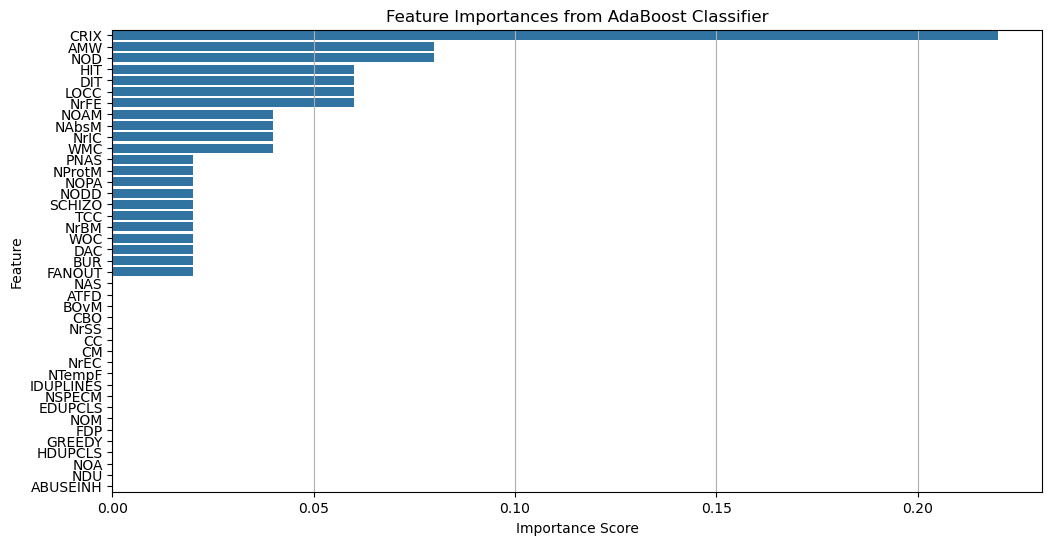

d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\anaconda3\Lib\site-packages\skle

Cross-Validation Scores (AdaBoost): [0.99397948 0.99440346 0.99321574 0.99287653 0.99355495]
Mean Cross-Validation Score (AdaBoost): 0.9936060314969636
--- Performance of AdaBoost Classifier on Training Data ---
Training Accuracy Score: 0.9943014144703368
Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     26659
           1       1.00      0.99      0.99     32303

    accuracy                           0.99     58962
   macro avg       0.99      0.99      0.99     58962
weighted avg       0.99      0.99      0.99     58962


--- Performance of AdaBoost Classifier on Test Data ---
Testing Accuracy Score: 0.9934875517264772
Testing Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6559
           1       1.00      0.99      0.99      8182

    accuracy                           0.99     14741
   macro avg       0.99      0.99 

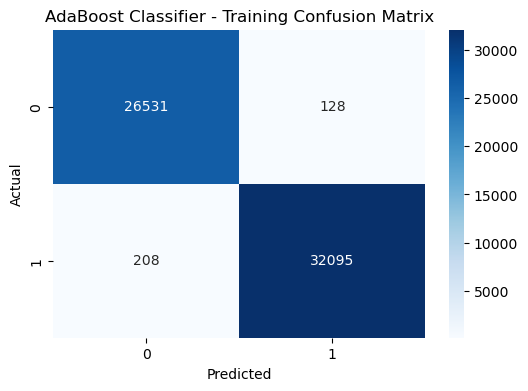

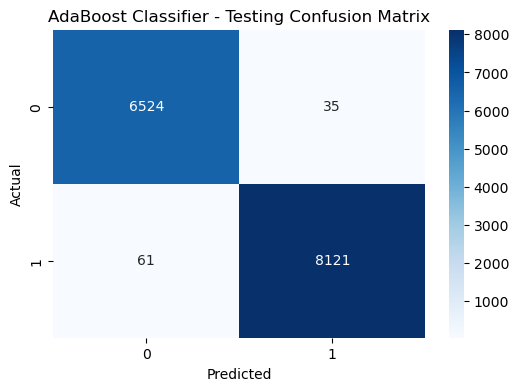

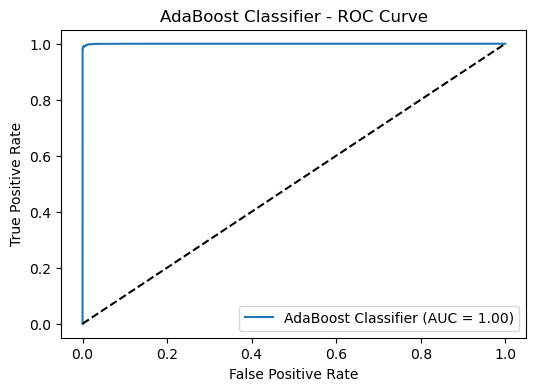

In [26]:
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
importances = ada_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print("\nFeature Importances for AdaBoost Classifier:")
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from AdaBoost Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Perform cross-validation for AdaBoost
cv_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-Validation Scores (AdaBoost):", cv_scores_ada)
print("Mean Cross-Validation Score (AdaBoost):", np.mean(cv_scores_ada))


evaluate_model(ada_model, X_test, y_test, model_name='AdaBoost Classifier')
